## 2. Surviving and death ratio.

In this section, we analyze the survival and death rates of lung cancer patients based on their treatment outcomes.

In [32]:
import pandas as pd
from matplotlib import pyplot as plt

In [33]:
dataset_path = '../data/dataset.csv'
df = pd.read_csv(dataset_path)

### 2.1 Surviving ratio by stage.

We calculate survival statistics grouped by cancer stage (`cancer_stage`). For each stage, the following metrics are computed:

- **Total patients**: the number of cases in that stage.
- **Total survivors**: the number of patients who survived after treatment (`survived == 1`).
- **Total deaths**: the number of patients who did not survive (`survived == 0`).
- **Survival ratio**: the proportion of survivors in that stage (as a raw value and as a percentage).
- **Death ratio**: the proportion of deaths in that stage (as a raw value and as a percentage).

The results are organized into a summary table, enabling a clear comparison across different stages of the disease.

In [34]:
stage_summaries = []

df_grouped_by_stage = df.groupby('cancer_stage')

for stage, data in df_grouped_by_stage:
    total_patients = len(data)
    
    total_survivors = data['survived'].sum()
    total_deaths = total_patients - total_survivors

    survival_ratio = total_survivors / total_patients
    survival_ratio_percentual = round(survival_ratio * 100, 2)

    death_ratio = total_deaths / total_patients
    death_ratio_percentual = round(death_ratio * 100, 2)

    stage_summaries.append({
        'cancer_stage': stage,
        'total_patients': total_patients,
        'total_survivors': total_survivors,
        'total_deaths': total_deaths,
        'survival_ratio': survival_ratio,
        'survival_ratio_percentual': f'{survival_ratio_percentual}%',
        'death_ratio': death_ratio,
        'death_ratio_percentual': f'{death_ratio_percentual}%'
    })

df_stage_summary = pd.DataFrame(stage_summaries)

display(df_stage_summary)

,cancer_stage,total_patients,total_survivors,total_deaths,survival_ratio,survival_ratio_percentual,death_ratio,death_ratio_percentual
0,Stage I,222516,48538,173978,0.218133,21.81%,0.781867,78.19%
1,Stage II,222363,49118,173245,0.220891,22.09%,0.779109,77.91%
2,Stage III,222594,49088,173506,0.220527,22.05%,0.779473,77.95%
3,Stage IV,222527,49260,173267,0.221366,22.14%,0.778634,77.86%


### 2.2 General surviving ratio.

Here, we calculate the overall survival and death rates across the entire dataset, regardless of cancer stage. This provides a general overview of the treatment outcomes for all lung cancer patients in the study.

The following metrics are included:

- **Total patients**
- **Total survivors**
- **Total deaths**
- **Overall survival ratio** (raw and percentage)
- **Overall death ratio** (raw and percentage)

This general analysis helps establish a baseline understanding of the dataset and can be used for comparison with segmented analyses like the one in 2.1.

In [35]:
total_patients = len(df)

total_survivors = df['survived'].sum()
total_deaths = total_patients - total_survivors

survival_ratio = total_survivors / total_patients
survival_ratio_percentual = round(survival_ratio * 100, 2)

death_ratio = total_deaths / total_patients
death_ratio_percentual = round(death_ratio * 100, 2)

print(f'Total Patients: {total_patients}')
print(f'Total Survivors: {total_survivors}')
print(f'Total Deaths: {total_deaths}')
print(f'Survival Ratio: {survival_ratio_percentual}%')
print(f'Death Ratio: {death_ratio_percentual}%')

Total Patients: 890000
Total Survivors: 196004
Total Deaths: 693996
Survival Ratio: 22.02%
Death Ratio: 77.98%


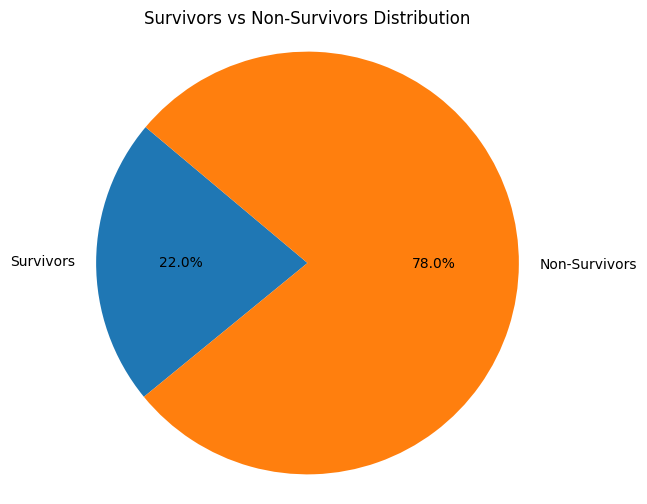

In [36]:
labels = ['Survivors', 'Non-Survivors']
sizes = [total_survivors, total_deaths]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Survivors vs Non-Survivors Distribution')
plt.axis('equal')
plt.show()

### 2.3 Surviving ratio by country.

We calculate survival statistics grouped by country (`country`). For each country, the following metrics are computed:

- **Total patients**: the number of cases at that country.
- **Total survivors**: the number of patients who survived after treatment (`survived == 1`).
- **Total deaths**: the number of patients who did not survive (`survived == 0`).
- **Survival ratio**: the proportion of survivors at that country (as a raw value and as a percentage).
- **Death ratio**: the proportion of deaths at that country (as a raw value and as a percentage).

The results are organized into a summary table, enabling a clear comparison across different countries.

In [37]:
country_summaries = []

df_grouped_by_country = df.groupby('country')

for country, data in df_grouped_by_country:
    total_patients = len(data)
    
    total_survivors = data['survived'].sum()
    total_deaths = total_patients - total_survivors

    survival_ratio = total_survivors / total_patients
    survival_ratio_percentual = round(survival_ratio * 100, 2)

    death_ratio = total_deaths / total_patients
    death_ratio_percentual = round(death_ratio * 100, 2)

    country_summaries.append({
        'country': country,
        'total_patients': total_patients,
        'total_survivors': total_survivors,
        'total_deaths': total_deaths,
        'survival_ratio': survival_ratio,
        'survival_ratio_percentual': f'{survival_ratio_percentual}%',
        'death_ratio': death_ratio,
        'death_ratio_percentual': f'{death_ratio_percentual}%'
    })

df_country_summary = pd.DataFrame(country_summaries)

display(df_country_summary)

,country,total_patients,total_survivors,total_deaths,survival_ratio,survival_ratio_percentual,death_ratio,death_ratio_percentual
0,Austria,32832,7153,25679,0.217867,21.79%,0.782133,78.21%
1,Belgium,32986,7243,25743,0.219578,21.96%,0.780422,78.04%
2,Bulgaria,32559,7175,25384,0.220369,22.04%,0.779631,77.96%
3,Croatia,33138,7287,25851,0.219899,21.99%,0.780101,78.01%
4,Cyprus,32719,7211,25508,0.220392,22.04%,0.779608,77.96%
5,Czech Republic,32885,7331,25554,0.222928,22.29%,0.777072,77.71%
6,Denmark,33024,7246,25778,0.219416,21.94%,0.780584,78.06%
7,Estonia,32893,7339,25554,0.223117,22.31%,0.776883,77.69%
8,Finland,32798,7296,25502,0.222453,22.25%,0.777547,77.75%
9,France,33199,7163,26036,0.215760,21.58%,0.784240,78.42%


### 2.4 Surviving ratio by genre.

We calculate survival statistics grouped by gender (`gender`). For each gender, the following metrics are computed:

- **Total patients**: the number of cases with that gender.
- **Total survivors**: the number of patients who survived after treatment (`survived == 1`).
- **Total deaths**: the number of patients who did not survive (`survived == 0`).
- **Survival ratio**: the proportion of survivors with that gender (as a raw value and as a percentage).
- **Death ratio**: the proportion of deaths with that gender (as a raw value and as a percentage).

The results are organized into a summary table, enabling a clear comparison between the genders.

In [38]:
gender_summaries = []

df_grouped_by_gender = df.groupby('gender')

for gender, data in df_grouped_by_gender:
    total_patients = len(data)
    
    total_survivors = data['survived'].sum()
    total_deaths = total_patients - total_survivors

    survival_ratio = total_survivors / total_patients
    survival_ratio_percentual = round(survival_ratio * 100, 2)

    death_ratio = total_deaths / total_patients
    death_ratio_percentual = round(death_ratio * 100, 2)

    gender_summaries.append({
        'gender': gender,
        'total_patients': total_patients,
        'total_survivors': total_survivors,
        'total_deaths': total_deaths,
        'survival_ratio': survival_ratio,
        'survival_ratio_percentual': f'{survival_ratio_percentual}%',
        'death_ratio': death_ratio,
        'death_ratio_percentual': f'{death_ratio_percentual}%'
    })

df_gender_summary = pd.DataFrame(gender_summaries)

display(df_gender_summary)

,gender,total_patients,total_survivors,total_deaths,survival_ratio,survival_ratio_percentual,death_ratio,death_ratio_percentual
0,Female,444866,97832,347034,0.219913,21.99%,0.780087,78.01%
1,Male,445134,98172,346962,0.220545,22.05%,0.779455,77.95%


### 2.5 Surviving ratio by treatment type.

We calculate survival statistics grouped by treatment type (`treatment_type`). For each treatment type, the following metrics are computed:

- **Total patients**: the number of cases with that treatment type.
- **Total survivors**: the number of patients who survived after treatment (`survived == 1`).
- **Total deaths**: the number of patients who did not survive (`survived == 0`).
- **Survival ratio**: the proportion of survivors with that treatment type (as a raw value and as a percentage).
- **Death ratio**: the proportion of deaths with that treatment type (as a raw value and as a percentage).

The results are organized into a summary table, enabling a clear comparison across different treatment type.

In [39]:
treatment_type_summaries = []

df_grouped_by_treatment_type = df.groupby('treatment_type')

for treatment_type, data in df_grouped_by_treatment_type:
    total_patients = len(data)
    
    total_survivors = data['survived'].sum()
    total_deaths = total_patients - total_survivors

    survival_ratio = total_survivors / total_patients
    survival_ratio_percentual = round(survival_ratio * 100, 2)

    death_ratio = total_deaths / total_patients
    death_ratio_percentual = round(death_ratio * 100, 2)

    treatment_type_summaries.append({
        'treatment_type': treatment_type,
        'total_patients': total_patients,
        'total_survivors': total_survivors,
        'total_deaths': total_deaths,
        'survival_ratio': survival_ratio,
        'survival_ratio_percentual': f'{survival_ratio_percentual}%',
        'death_ratio': death_ratio,
        'death_ratio_percentual': f'{death_ratio_percentual}%'
    })

df_treatment_type_summary = pd.DataFrame(treatment_type_summaries)

display(df_treatment_type_summary)

,treatment_type,total_patients,total_survivors,total_deaths,survival_ratio,survival_ratio_percentual,death_ratio,death_ratio_percentual
0,Chemotherapy,223262,48836,174426,0.218739,21.87%,0.781261,78.13%
1,Combined,222609,49002,173607,0.220126,22.01%,0.779874,77.99%
2,Radiation,220868,48714,172154,0.220557,22.06%,0.779443,77.94%
3,Surgery,223261,49452,173809,0.221499,22.15%,0.778501,77.85%
